In [221]:
# Standard 
import numpy as np 
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn 

#stats
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

#titanic as dataframe
titanic_df=pd.read_csv('train.csv')

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [222]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Who were the passengers on Titanic?
#What deck and relation to the class 
#where the passangers come from 
#Who was alone , who with family 

#what factors  help someone survive the titanic 


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

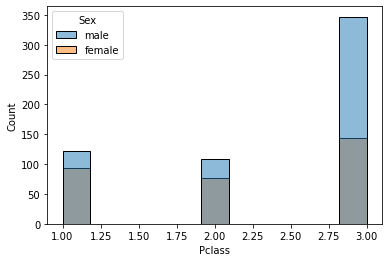

In [223]:
# 1. Who were the passengers on the Titanic? based on sex,class,age 

sns.histplot(x="Pclass",data=titanic_df,hue="Sex")

In [224]:
def male_female_child(passenger):
    age,sex = passenger 
    
    if age <16:
        return 'child'
    else:
     return sex

In [225]:
titanic_df['person']=titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [226]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<AxesSubplot:xlabel='Pclass', ylabel='Count'>

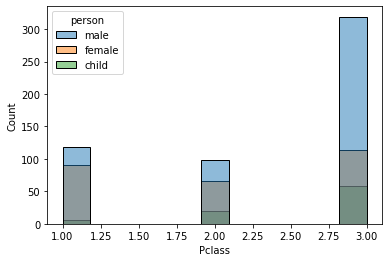

In [227]:
sns.histplot(x="Pclass",data=titanic_df,hue="person")

<AxesSubplot:>

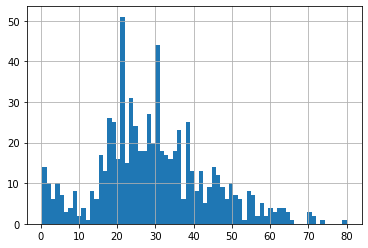

In [228]:
titanic_df['Age'].hist(bins=70)

In [229]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

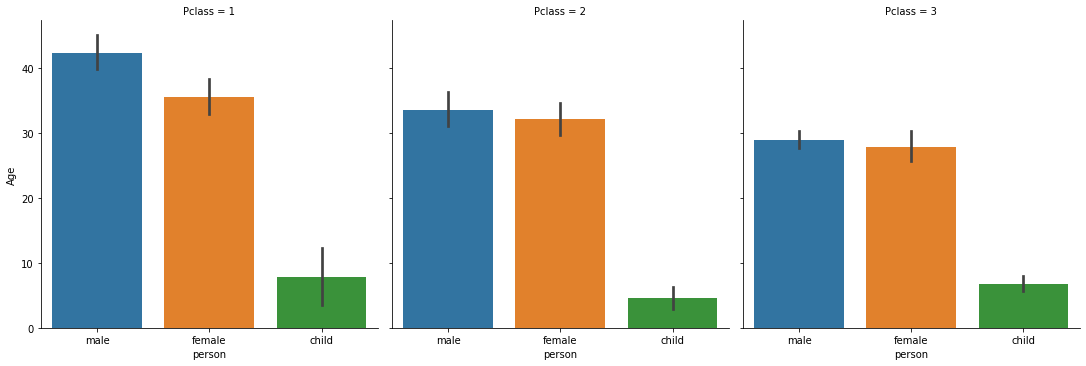

In [230]:
sns.catplot(x="person", y="Age", col="Pclass",
                data=titanic_df,
                kind="bar")


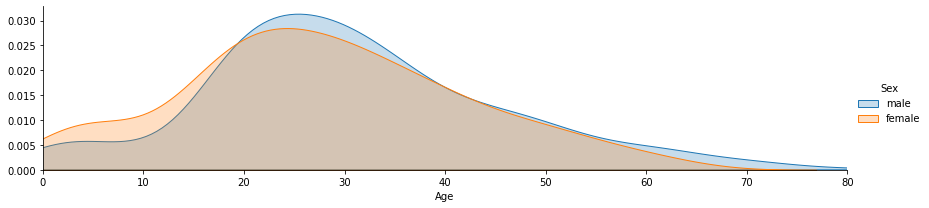

In [231]:
#facet plot 
fig =sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

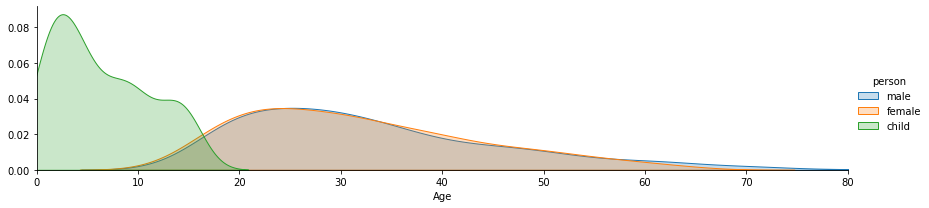

In [232]:
fig =sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

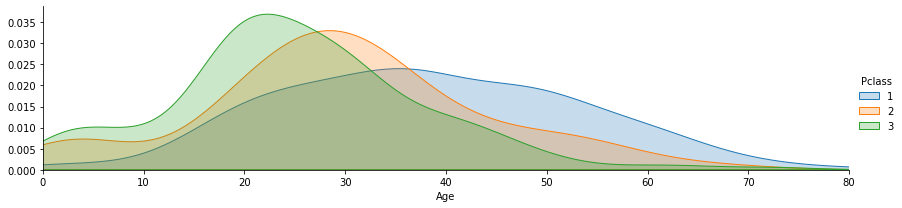

In [233]:
fig =sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [ ]:
#2 What deck the passengers are  and the relation with the class (cabin is the deck we what A,B,C dont care the number)

In [234]:
deck=titanic_df['Cabin'].dropna()

In [235]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<AxesSubplot:xlabel='Cabin', ylabel='count'>

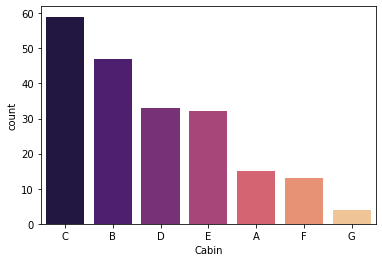

In [236]:
levels=[]

for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels)
cabin_df.columns=['Cabin']
cabin_df=cabin_df[cabin_df.Cabin !='T']
sns.countplot(x = 'Cabin', data = cabin_df, palette = 'magma', order=cabin_df['Cabin'].value_counts().index)

               

<AxesSubplot:xlabel='Embarked', ylabel='count'>

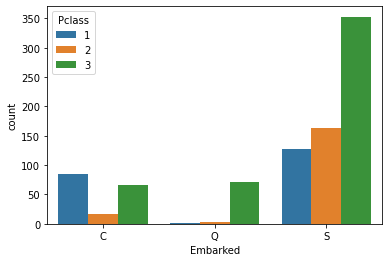

In [237]:
sns.countplot(x = 'Embarked',data = titanic_df,hue='Pclass', order=['C','Q','S'])

In [238]:
# 3. Who was alone , who with family 1=family, 0=no sublings , parch 0=children or parents, 1= no children , no parents 
# if SibSp==0 and Parch ==0 --> completely alone 

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone'].loc[titanic_df['Alone']>0]='With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0]='Alone'
titanic_df

/Users/markella/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone


<AxesSubplot:xlabel='Alone', ylabel='count'>

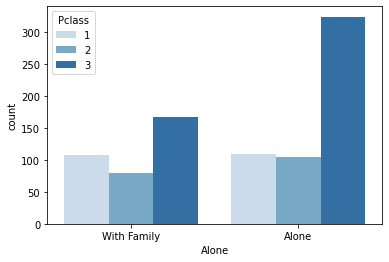

In [239]:
sns.countplot(x = 'Alone',data = titanic_df,hue='Pclass', palette="Blues")

<AxesSubplot:xlabel='Survivor', ylabel='count'>

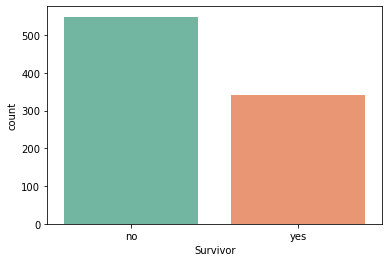

In [240]:
# 4.what factors  help someone survive the titanic 


titanic_df['Survivor']=titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot(x = 'Survivor',data = titanic_df, palette="Set2")

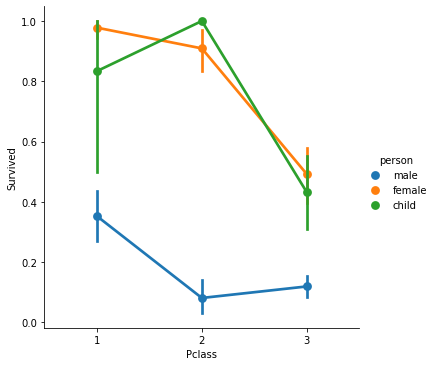

In [241]:
sns.catplot(x = 'Pclass',y='Survived',hue='person',data = titanic_df,kind='point')

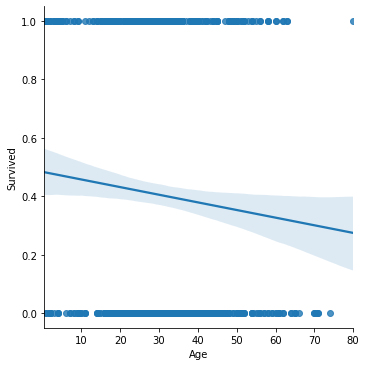

In [242]:
sns.lmplot(data=titanic_df,x="Age",y="Survived")
#the older the pessanger the lowest to survive

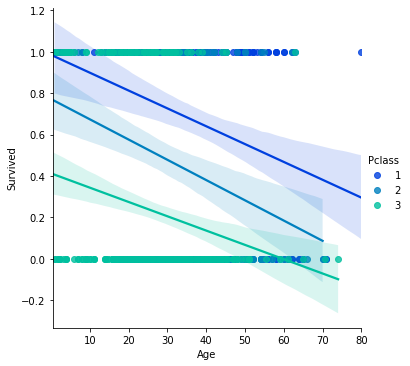

In [243]:
#what age,class affect the surival 

sns.lmplot(x="Age", y="Survived", hue="Pclass", data=titanic_df,
               palette="winter")

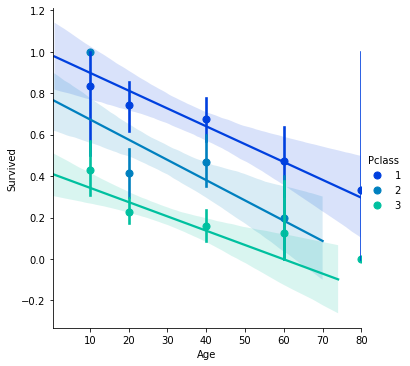

In [141]:
generations=[10,20,40,60,80]
sns.lmplot(x="Age", y="Survived", hue="Pclass", data=titanic_df,
               palette="winter",x_bins=generations)

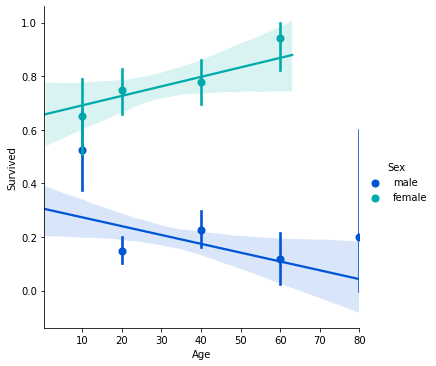

In [244]:
sns.lmplot(x="Age", y="Survived", hue="Sex", data=titanic_df,
               palette="winter",x_bins=generations)

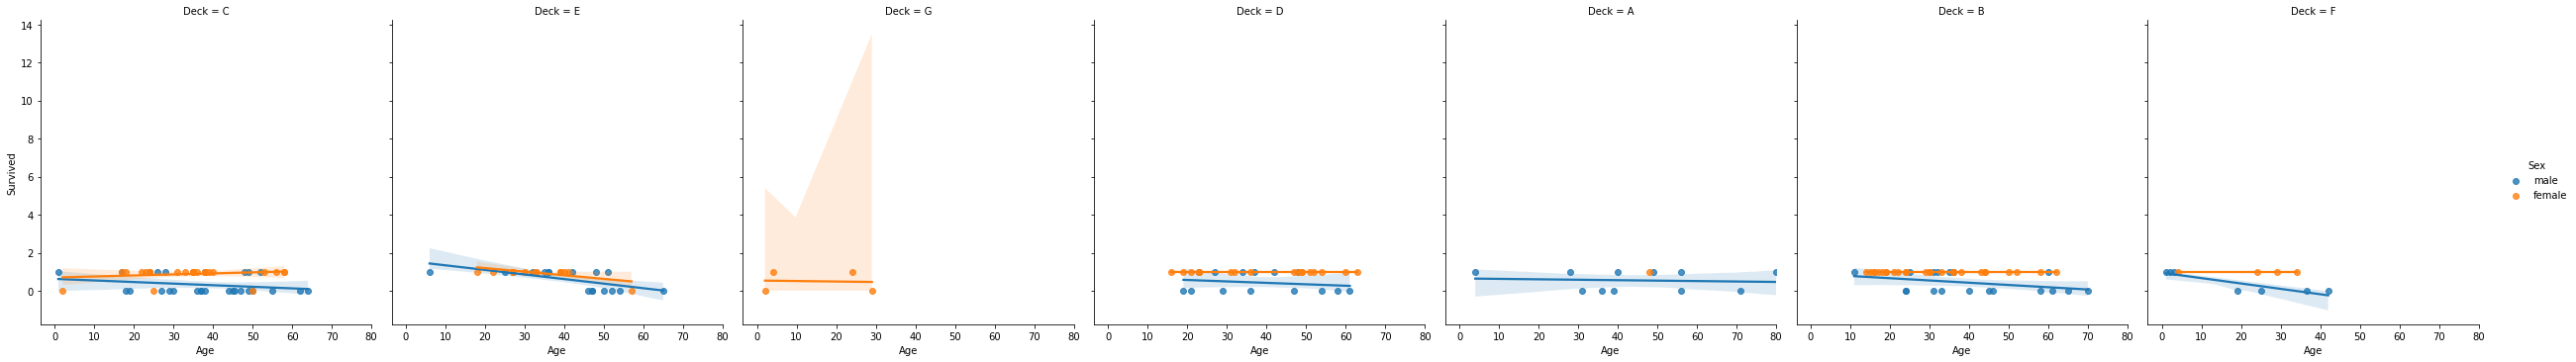

In [321]:
# Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition
decks=titanic_df['Cabin'].dropna()
titanic_df['Deck'] = decks.astype(str).str[0].dropna()
titanic_df['Deck'].dropna()
titanic_df=titanic_df[titanic_df.Deck !='T']
#sns.countplot(x = 'Deck', data = titanic_df, palette = 'magma', order=titanic_df['Deck'].value_counts().index)


#sns.lmplot(x="Deck", y="Survived", data=titanic_df,hue="Sex",
              # palette="winter")



sns.lmplot(x="Age", y="Survived",hue="Sex",col="Deck",
               data=titanic_df)




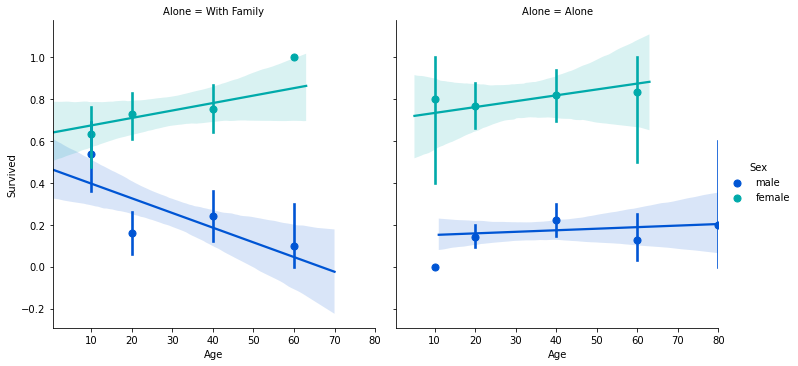

In [327]:
#Did having a family  member increase the odds of surving the crash?

sns.lmplot(x="Age", y="Survived", col="Alone",hue="Sex", data=titanic_df,
               palette="winter",x_bins=generations)
